In [10]:
import pandas as pd
import time
from datetime import datetime
import numpy as np
import squarify
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By


# Declare browser
chrome_driver_path = '/home/user/Downloads/chromedriver-linux64/chromedriver'
#change "user" to your pc user
service = Service(chrome_driver_path)# Create a Service object
driver = webdriver.Chrome(service=service) # Pass the Service object to the webdriver.Chrome

#define url of page to exract data fromfrom selenium.webdriver.common.by import By
url='https://coinmarketcap.com/gainers-losers/'
driver.get(url)
time.sleep(5) #Sleep for few seconds so, by that time, the webpage gets loaded.
ranking =  driver.find_elements(By.XPATH, '//*[@id="__next"]/div[2]/div/div[2]/div/div[2]/div/div[1]/div/table')# get element by XPATH from element selection in inspect mode

""" rec =  [s.text for s in ranking] + rec #this will return ['#\nName\nPrice\n24h\nVolume(24h)
print(rec) """

data = []
for index, rank in enumerate(ranking):
    rowData = rank.text.split('\n')
    #print(rowData) #This prints the extracted data all in a single row
    data.append(rowData)
'''print(rowData)'''


'print(rowData)'

In [12]:
#Resahaping the data list to # cols, should be indented or not?
lst1 = rowData[5:] #popping headers
expectedRows = len(lst1) // 4 #divide the list by no of expected cols to get no of expected rows
lst = np.array(lst1)#turning the simngle rowdata list into an array
reshpd = lst.reshape(int(expectedRows), 4) #to get row x col
'''print(reshpd)'''
reshpdtrimmed = reshpd[:, :-1]#'Price' '24h%' 'Vol(24h)' were merged together so I popped them
forth = np.array([row[3].split() for row in reshpd])#now splitting 'Price' '24h%' 'Vol(24h)' on their own
'''print(reshpdtrimmed)'''
merged = np.concatenate((reshpdtrimmed, forth), axis = 1)#coming together making the perfect array
'''print(merged)'''
first10 = np.array(merged[:10])#only need the first 10
'''print(first10)'''

#passing to nympy Dataframe to get tabular form
df = pd.DataFrame(first10, columns=['CmcRank', 'Name', 'Symbol', 'Price', '24h%', 'Vol(24h)'])
#Initially getting errors of ValueError: 5 columns passed, passed data had 125 columns
#so needed to break the  cols down into 5
print(df)

df['24h%'] = df['24h%'].str.rstrip('%').astype(float)

  CmcRank                   Name Symbol         Price    24h%      Vol(24h)
0      70  Ethereum Name Service    ENS        $31.46  22.04%  $324,517,915
1      41              dogwifhat    WIF         $2.25  11.77%  $446,712,630
2      80             MultiversX   EGLD        $31.21   9.12%   $35,184,470
3      98               Mog Coin    MOG  $0.000001887   7.84%   $44,370,411
4      82                   Beam   BEAM      $0.01703   7.81%   $12,608,286
5      54                   Bonk   BONK   $0.00002371   7.63%  $200,854,315
6      48              Bittensor    TAO       $277.86   7.62%   $38,464,776
7      40              Immutable    IMX         $1.58   7.42%   $61,520,993
8      56          Brett (Based)  BRETT       $0.1607   6.35%   $48,797,288
9      39                  Maker    MKR     $2,606.89   6.11%   $74,191,198


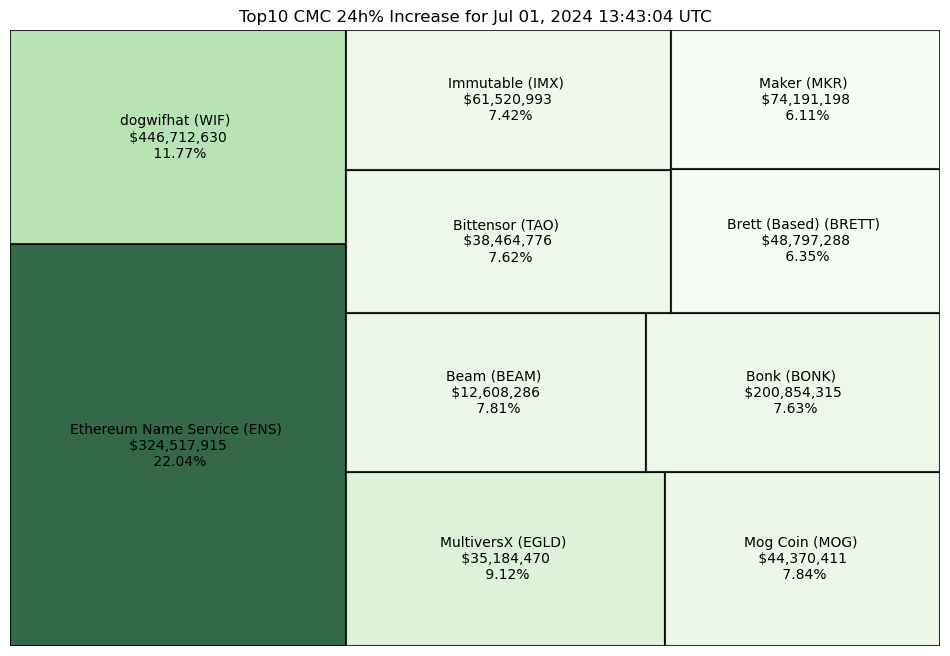

<bound method ChromiumDriver.quit of <selenium.webdriver.chrome.webdriver.WebDriver (session="d45f1111019a5a1289ba20a2171ffd32")>>

In [14]:
norm = plt.Normalize(df['24h%'].min(), df['24h%'].max())
colors = plt.cm.Greens(norm(df['24h%']))

# Create the plot
plt.figure(figsize=(12, 8)) #creates canvas for the plot
squarify.plot(sizes=df['24h%'], label=[f"{name} ({symbol}) \n {vol} \n {percent}%" for name, symbol, vol, percent in zip(df['Name'], df['Symbol'], df['Vol(24h)'], df['24h%'])], alpha=0.8, color=colors, edgecolor='black', linewidth=1.5)
#timestamp = datetime.utcnow().strftime('%d/%m/%Y %H:%M:%S UTC') #timestamp for the plot
timestamp = datetime.utcnow().strftime('%b %d, %Y %H:%M:%S UTC') #timestamp for the plot

# Customize the plot
plt.title(f'Top10 CMC 24h% Increase for {timestamp}')
plt.axis('off')  # Remove axes
plt.show()


driver.quit
